In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Create a set of random latitue and longitude combinations.
lats= np.random.uniform(-90.000, 90.000, size = 1500)
lngs= np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs



In [3]:
# Add the lats and lngs to a list
coordinates = list (lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-44.18249234815121 -116.40570631728534
-26.765189069192267 -140.9223744541299
51.55561404986335 -78.34084726868548
-25.27857138056885 -106.32652212525696
-59.07671724182154 18.54767124956581
-40.41689181601414 64.48945514972911
-35.36057155740506 135.40540059760883
-22.51506356823485 -35.36710513943541
24.446982165428807 43.79996745462563
80.99773956965032 0.09397276511154473
-63.66392823660816 -70.50162640659819
-19.522801130781602 -123.54885673671949
-82.10804644768166 76.0002955698468
20.06612928372789 -21.78031037189075
83.86444756761318 35.44990138385626
41.091331223131334 -75.4566647676074
6.660503421047991 -151.74343947478667
22.66757958516314 58.204206128945856
-60.00675819051648 -11.188591817540498
82.62932441312608 -130.25628437814984
48.78103016292829 -145.55022459782214
-78.47828105368319 -11.221554886042014
-42.80619642347512 -101.22445897307789
-13.135543269475619 -19.889199640956974
-86.6553303837052 -146.9846625799314
37.430959618087044 -29.963405780520446
76.4265192419

-66.47847136342406 -79.15269601127393
-51.4290930733202 26.611430506784018
-65.30593676779658 149.54071745683814
-8.487609300635171 -129.72850679088344
62.65404300482601 6.885023832781258
31.46727638756606 165.59139677622574
20.246176390045633 -55.91763923804092
76.918226191325 25.07998135824471
81.07526230553447 24.743396960777687
-68.88185233270987 -31.198663498199437
-53.888475940021486 -176.60602614497697
-60.69295770402539 125.66713624855123
11.726485053213636 36.90214780237005
-45.560032146073276 166.92832587843628
50.906305485886264 137.70658130791008
78.0190906287605 -12.37636669643291
17.660113148103306 -70.93535791953337
-9.210833077968658 89.70007762846757
-47.07092966591776 -115.67887376762353
-82.51584110295614 38.5121775391824
32.355063756253855 153.4264839527358
-32.687578594570084 160.78182051481866
-50.05722673732695 107.02070013361782
-14.639747742552956 -8.067874565048982
38.69983485974598 -178.72596782262997
-3.0592856979915837 86.93072286937229
-41.9659653875085 -1

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Add unique city names to cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


613

In [6]:
# Import requests and API key
import requests
from config_Copy1 import weather_api_key

# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key


In [7]:
# Import time and datetime from datetime
import time
from datetime import datetime

# Initialize empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data Retrieval    ')
print('----------------------------')

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 
    if (i %50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    # Add 1 to the record count 
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the city date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({'City':city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date
                         })
# Add exception block for errors
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Data Loading is complete
print('----------------------------')
print('Data Retrieval Complete     ')
print('----------------------------')
        

Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | matagami
Processing Record 3 of set 1 | bredasdorp
Processing Record 4 of set 1 | saint-philippe
Processing Record 5 of set 1 | port lincoln
Processing Record 6 of set 1 | vila velha
Processing Record 7 of set 1 | buraydah
Processing Record 8 of set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of set 1 | ushuaia
Processing Record 10 of set 1 | busselton
Processing Record 11 of set 1 | santa maria
Processing Record 12 of set 1 | vardo
Processing Record 13 of set 1 | east stroudsburg
Processing Record 14 of set 1 | hilo
Processing Record 15 of set 1 | ibra
Processing Record 16 of set 1 | cape town
Processing Record 17 of set 1 | tuktoyaktuk
Processing Record 18 of set 1 | kodiak
Processing Record 19 of set 1 | castro
Processing Record 20 of set 1 | georgetown
Processing Record 21 of set 1 | mataura
Processing Record 22 of set 1 | ribeira grande
Processing Record 23 of set 1 | belushya guba
City not f

Processing Record 40 of set 4 | aswan
Processing Record 41 of set 4 | port blair
Processing Record 42 of set 4 | yeniseysk
Processing Record 43 of set 4 | bahia honda
Processing Record 44 of set 4 | kargil
Processing Record 45 of set 4 | kruisfontein
Processing Record 46 of set 4 | tubruq
City not found. Skipping...
Processing Record 47 of set 4 | linguere
Processing Record 48 of set 4 | provideniya
Processing Record 49 of set 4 | tautira
Processing Record 50 of set 4 | solnechnyy
Processing Record 1 of set 5 | geraldton
Processing Record 2 of set 5 | pevek
Processing Record 3 of set 5 | victoria
Processing Record 4 of set 5 | kushima
Processing Record 5 of set 5 | berezovyy
Processing Record 6 of set 5 | quatre cocos
Processing Record 7 of set 5 | vanavara
Processing Record 8 of set 5 | astaneh-ye ashrafiyeh
Processing Record 9 of set 5 | hammerfest
Processing Record 10 of set 5 | tura
Processing Record 11 of set 5 | alihe
Processing Record 12 of set 5 | maningrida
Processing Record 1

Processing Record 1 of set 8 | khonuu
City not found. Skipping...
Processing Record 2 of set 8 | lima
Processing Record 3 of set 8 | werda
Processing Record 4 of set 8 | taoudenni
Processing Record 5 of set 8 | dasoguz
Processing Record 6 of set 8 | clyde river
Processing Record 7 of set 8 | uzhur
Processing Record 8 of set 8 | pachmarhi
Processing Record 9 of set 8 | korla
Processing Record 10 of set 8 | bure
Processing Record 11 of set 8 | wukari
Processing Record 12 of set 8 | rawson
Processing Record 13 of set 8 | ihosy
Processing Record 14 of set 8 | hay river
Processing Record 15 of set 8 | jalu
Processing Record 16 of set 8 | port hedland
Processing Record 17 of set 8 | te anau
Processing Record 18 of set 8 | kalofer
Processing Record 19 of set 8 | cockburn harbour
City not found. Skipping...
Processing Record 20 of set 8 | neuquen
Processing Record 21 of set 8 | ibb
Processing Record 22 of set 8 | rathdrum
Processing Record 23 of set 8 | maniitsoq
Processing Record 24 of set 8 

Processing Record 1 of set 12 | mbandaka
City not found. Skipping...
Processing Record 2 of set 12 | gobo
City not found. Skipping...
Processing Record 3 of set 12 | nam tha
City not found. Skipping...
Processing Record 4 of set 12 | sterling
City not found. Skipping...
Processing Record 5 of set 12 | farafangana
City not found. Skipping...
Processing Record 6 of set 12 | dubai
City not found. Skipping...
Processing Record 7 of set 12 | buala
City not found. Skipping...
Processing Record 8 of set 12 | svobodnyy
City not found. Skipping...
Processing Record 9 of set 12 | atka
City not found. Skipping...
Processing Record 10 of set 12 | kannod
City not found. Skipping...
Processing Record 11 of set 12 | trairi
City not found. Skipping...
Processing Record 12 of set 12 | mullaitivu
City not found. Skipping...
Processing Record 13 of set 12 | taltal
City not found. Skipping...
Processing Record 14 of set 12 | kieta
City not found. Skipping...
Processing Record 15 of set 12 | kaihua
City no

In [9]:
# Convert the array of dictionaries into a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.82,74,77,14.23,PF,2022-07-01 20:56:01
1,Matagami,49.7502,-77.6328,69.91,40,40,12.66,CA,2022-07-01 20:56:01
2,Bredasdorp,-34.5322,20.0403,59.32,58,0,4.63,ZA,2022-07-01 20:56:02
3,Saint-Philippe,-21.3585,55.7679,67.59,71,94,14.74,RE,2022-07-01 20:56:02
4,Port Lincoln,-34.7333,135.8667,52.77,61,100,7.90,AU,2022-07-01 20:56:03
5,Vila Velha,-20.3297,-40.2925,73.35,87,20,5.75,BR,2022-07-01 20:56:04
6,Buraydah,26.3260,43.9750,93.65,12,13,10.71,SA,2022-07-01 20:56:04
7,Ushuaia,-54.8000,-68.3000,38.86,60,75,4.61,AR,2022-07-01 20:56:05
8,Busselton,-33.6500,115.3333,47.77,78,0,5.86,AU,2022-07-01 20:56:05
9,Santa Maria,-29.6842,-53.8069,61.90,72,0,6.91,BR,2022-07-01 20:54:00


In [11]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-07-01 20:56:01,-23.1203,-134.9692,71.82,74,77,14.23
1,Matagami,CA,2022-07-01 20:56:01,49.7502,-77.6328,69.91,40,40,12.66
2,Bredasdorp,ZA,2022-07-01 20:56:02,-34.5322,20.0403,59.32,58,0,4.63
3,Saint-Philippe,RE,2022-07-01 20:56:02,-21.3585,55.7679,67.59,71,94,14.74
4,Port Lincoln,AU,2022-07-01 20:56:03,-34.7333,135.8667,52.77,61,100,7.90
5,Vila Velha,BR,2022-07-01 20:56:04,-20.3297,-40.2925,73.35,87,20,5.75
6,Buraydah,SA,2022-07-01 20:56:04,26.3260,43.9750,93.65,12,13,10.71
7,Ushuaia,AR,2022-07-01 20:56:05,-54.8000,-68.3000,38.86,60,75,4.61
8,Busselton,AU,2022-07-01 20:56:05,-33.6500,115.3333,47.77,78,0,5.86
9,Santa Maria,BR,2022-07-01 20:54:00,-29.6842,-53.8069,61.90,72,0,6.91


In [12]:
# Create the output file(CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [13]:
# Extract relevant data for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']



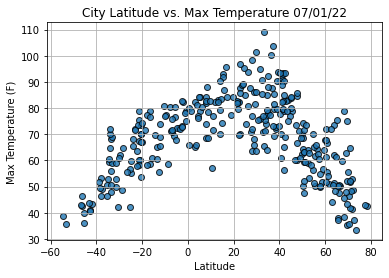

In [15]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temps,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8, 
           label = 'Cities')
# Titles, labels and time
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show
plt.show()


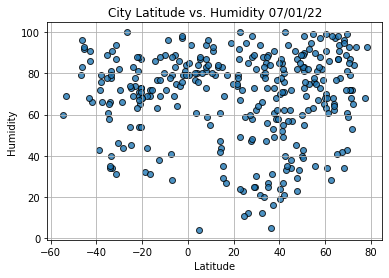

In [16]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           humidity,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8, 
           label = 'Cities')
# Titles, labels and time
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show
plt.show()



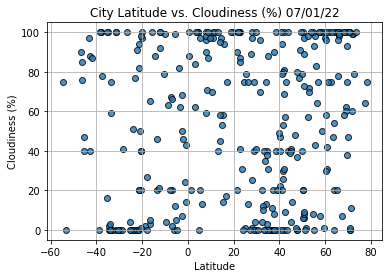

In [17]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8, 
           label = 'Cities')
# Titles, labels and time
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show
plt.show()



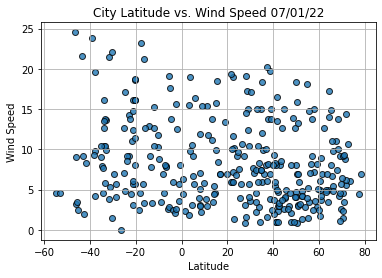

In [18]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8, 
           label = 'Cities')
# Titles, labels and time
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show
plt.show()




In [80]:
# Import linear regression from scipy stats
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Line regression for weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values*slope + intercept
    
    # Get the line equation
    line_eq = 'y = ' + str(round(slope, 2)) + 'x +' + str(round(intercept, 2))
    
    # Create scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    
    # Plot the regression line with the x_values and the y
    # coordinates based on the intercept and slope
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation and its coordinates
    plt.annotate (line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title (title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [81]:
# Creating northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

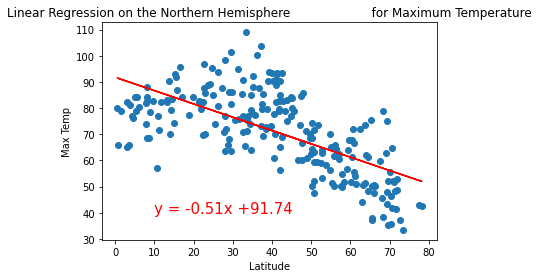

In [82]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                    for Maximum Temperature', 'Max Temp', (10,40))

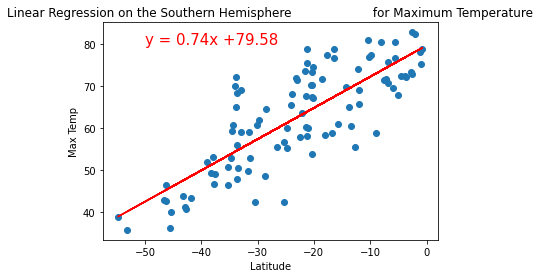

In [83]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                    for Maximum Temperature', 'Max Temp', (-50,80))

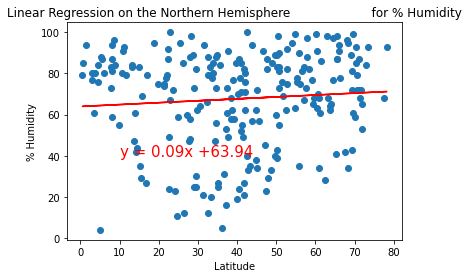

In [95]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                    for % Humidity', '% Humidity', (10,40))

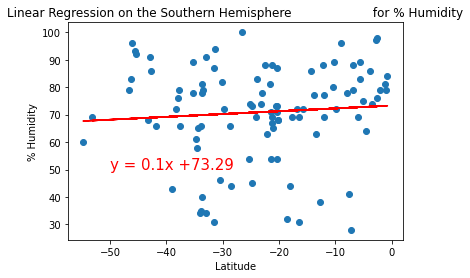

In [96]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                    for % Humidity', '% Humidity', (-50,50))

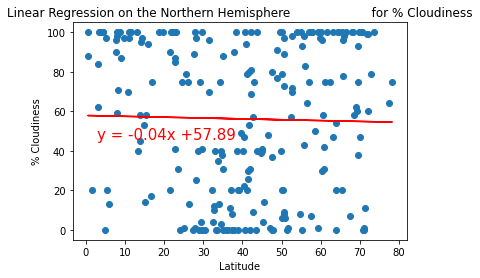

In [97]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness', (3,46))

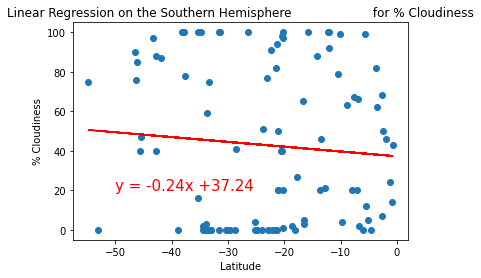

In [94]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                    for % Cloudiness', '% Cloudiness', (-50,20))

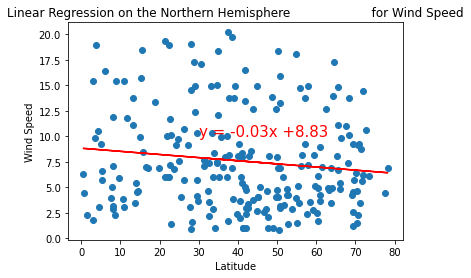

In [100]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                    for Wind Speed', 'Wind Speed', (30,10))

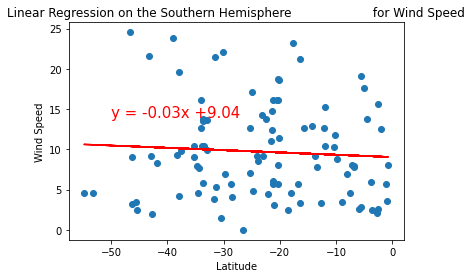

In [103]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                    for Wind Speed', 'Wind Speed', (-50,14))